This file runs our baseline experiments that recreate the results of the original Chen et al. paper.

# Step 0. Setup + Dependencies

In [ ]:
import os
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import time

In [ ]:
root = '/gdrive/MyDrive/cifar10_resnet/original/label_representations' 
os.chdir(root)
# ! git clone https://github.com/BoyuanChen/label_representations.git

In [ ]:
! pip install torchtoolbox

     |████████████████████████████████| 84 kB 2.1 MB/s 
     |████████████████████████████████| 4.0 MB 48.7 MB/s 
     |████████████████████████████████| 77 kB 4.9 MB/s 
     |████████████████████████████████| 6.6 MB 47.8 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
     |████████████████████████████████| 895 kB 21.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Step 1. Understanding the distributions of the original labels

In [ ]:
% cd labels

/gdrive/.shortcut-targets-by-id/1c2LSqs3KLPC0GItMw4Fbh9nCUbujuKG_/cifar10_resnet/original/label_representations/labels


In [ ]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.special import kl_div

In [ ]:
original = glob.glob(root + '/labels/label_files/cifar10/*.npy')
new = glob.glob(root + '/labels/label_files/new/*.npy')

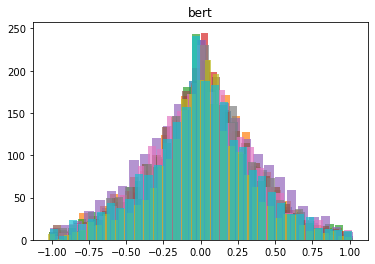

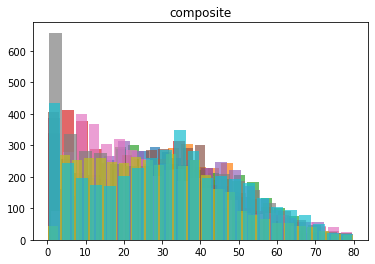

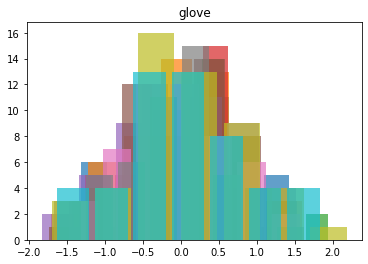

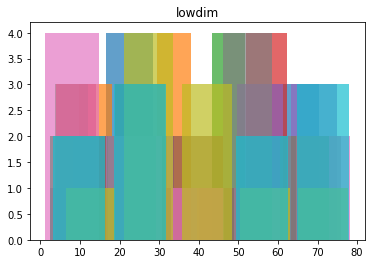

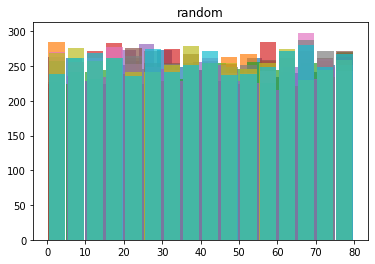

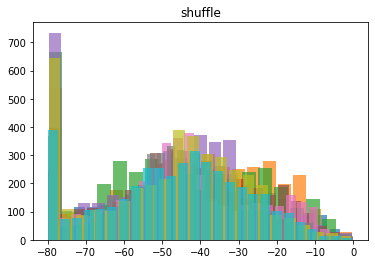

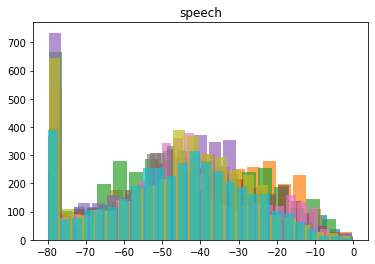

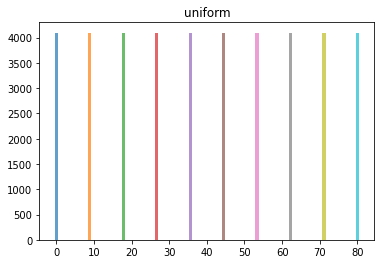

In [ ]:
for file in original:

  array = np.load(file)
  name = file.split('/')[-1].split('_')[-1][:-4]

  for i in range(10):
    plt.hist(x=array[i].flatten(), bins='auto', alpha=0.7, rwidth=0.85)

  plt.title(name)
  plt.show()

These are distributions of our original labels for the entropy experiment.

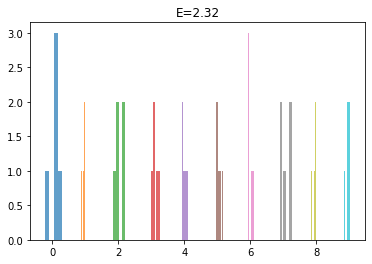

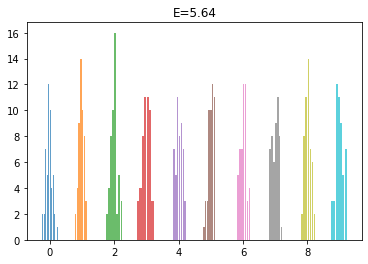

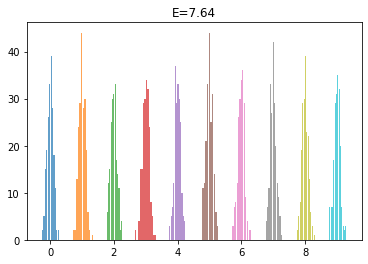

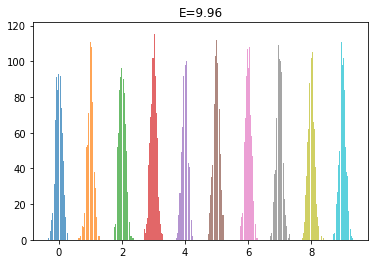

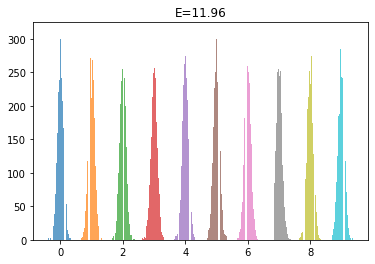

In [ ]:
epsilons = ['E=2.32', 'E=5.64', 'E=7.64', 'E=9.96', 'E=11.96']
dims = ['5','50','200','1000','4000']

counter = 0
for file in new:
  name = file.split('/')[-1]
  if name.split('=')[-1][:-4] not in dims:
    continue
  array = np.load(file)
  name = file.split('/')[-1]

  for i in range(10):
    plt.hist(x=array[i].flatten(), bins='auto', alpha=0.7, rwidth=0.85)

  plt.title(epsilons[counter])
  counter += 1
  plt.show()

In [ ]:
! python compute_entropy.py label_files/cifar10

----------------------
label_files/cifar10/cifar10_bert.npy min: 0.0
label_files/cifar10/cifar10_bert.npy max: 1.0
label_files/cifar10/cifar10_bert.npy std: 0.17369791865348816
label_files/cifar10/cifar10_bert.npy entropy: 11.075156655032417
label_files/cifar10/cifar10_bert.npy entropy std: 0.009731746950955725
label_files/cifar10/cifar10_bert.npy average dist: 0.08897765124285661
label_files/cifar10/cifar10_bert.npy L2 dist: 5.718899250030518
label_files/cifar10/cifar10_bert.npy L2 dist std: 0.949183464050293
label_files/cifar10/cifar10_bert.npy L1 dist: 2.0570459365844727
label_files/cifar10/cifar10_bert.npy L1 dist std: 0.24493110179901123
label_files/cifar10/cifar10_bert.npy shape: (10, 48, 48)
----------------------
----------------------
label_files/cifar10/cifar10_composite.npy min: 0.0
label_files/cifar10/cifar10_composite.npy max: 1.0
label_files/cifar10/cifar10_composite.npy std: 0.22887475788593292
label_files/cifar10/cifar10_composite.npy entropy: 11.668962735906824
label_f

# Step 2. Collecting baseline accuracies with no noise

## Categorical Labels

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label category
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_category_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num ep

## High-dimensional

speech, shuffle, uniform, composite, bert, and random

### Speech

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label speech
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_speech_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 200
/usr

### Shuffled Speech

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_shuffle_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 2

### Uniform/Constant

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_uniform_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 2

### Composite

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label composite
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_composite_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified

### Bert

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label bert
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_bert_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 200
/usr/local/lib/pyt

### Random

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label random
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_random_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 200
/usr

## Low-Dim

lowdim and glove

### Lowdim

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 lowdim model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_lowdim_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_lowdim/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 200
/usr

### Glove

In [ ]:
start = time.time()
! python train.py --model resnet32 --dataset cifar10 --seed 7 --label glove
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 glove model with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_glove/glove_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/cifar10/seed7/resnet32/model_glove/glove_seed7_resnet32_checkpoint.pth.
Log location: outputs/log/cifar10_glove_log.csv.
Snapshots location: outputs/cifar10/seed7/resnet32/model_glove/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloaded and verified
Num epochs: 200
/usr/local/

# Step 3. Attacking & Adding noise

## Categorical Labels

In [ ]:
! python3 attack.py --model resnet32 --dataset cifar10 --seed 7 --label category

Start attacking cifar10 category model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_category/category_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8804 / 10000 = 0.8804
Epsilon: 0.05	Test Accuracy = 1505 / 10000 = 0.1505
Epsilon: 0.1	Test Accuracy = 956 / 10000 = 0.0956
Epsilon: 0.15	Test Accura

## High-dimensional

### Speech

In [ ]:
! python3 attack.py --label speech --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 speech model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_speech/speech_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8576 / 10000 = 0.8576
Epsilon: 0.05	Test Accuracy = 5916 / 10000 = 0.5916
Epsilon: 0.1	Test Accuracy = 5626 / 10000 = 0.5626
Epsilon: 0.15	Test Accuracy = 5265

### Shuffled Speech

In [ ]:
! python3 attack.py --label shuffle --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 shuffle model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8633 / 10000 = 0.8633
Epsilon: 0.05	Test Accuracy = 5576 / 10000 = 0.5576
Epsilon: 0.1	Test Accuracy = 5110 / 10000 = 0.511
Epsilon: 0.15	Test Accuracy = 

### Uniform

In [ ]:
! python3 attack.py --label uniform --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 uniform model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_uniform/uniform_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 7613 / 10000 = 0.7613
Epsilon: 0.05	Test Accuracy = 3941 / 10000 = 0.3941
Epsilon: 0.1	Test Accuracy = 3401 / 10000 = 0.3401
Epsilon: 0.15	Test Accuracy =

### Composite

In [ ]:
! python3 attack.py --label composite --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 composite model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_composite/composite_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8554 / 10000 = 0.8554
Epsilon: 0.05	Test Accuracy = 3053 / 10000 = 0.3053
Epsilon: 0.1	Test Accuracy = 2376 / 10000 = 0.2376
Epsilon: 0.15	Test 

### Bert

In [ ]:
! python3 attack.py --label bert --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 bert model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_bert/bert_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8753 / 10000 = 0.8753
Epsilon: 0.05	Test Accuracy = 5019 / 10000 = 0.5019
Epsilon: 0.1	Test Accuracy = 4362 / 10000 = 0.4362
Epsilon: 0.15	Test Accuracy = 3869 / 10000 =

### Random

In [ ]:
! python3 attack.py --label random --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 random model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_random/random_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8456 / 10000 = 0.8456
Epsilon: 0.05	Test Accuracy = 6349 / 10000 = 0.6349
Epsilon: 0.1	Test Accuracy = 5974 / 10000 = 0.5974
Epsilon: 0.15	Test Accuracy = 5547

## Low-Dim

### Lowdim

In [ ]:
! python3 attack.py --label lowdim --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 lowdim model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8529 / 10000 = 0.8529
Epsilon: 0.05	Test Accuracy = 5710 / 10000 = 0.571
Epsilon: 0.1	Test Accuracy = 5162 / 10000 = 0.5162
Epsilon: 0.15	Test Accuracy = 4703 

### Glove

In [ ]:
! python3 attack.py --label glove --model resnet32 --dataset cifar10 --seed 7

Start attacking cifar10 glove model (kNN) with manual seed 7 and model resnet32.
Best model location: outputs/cifar10/seed7/resnet32/model_glove/glove_seed7_resnet32_best_model.pth.
Attack results location: outputs/cifar10/seed7/resnet32/model_glove/glove_seed7_resnet32_attack_results_NN.pth.
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Test FGSM untargeted
Epsilon: 0	Test Accuracy = 8737 / 10000 = 0.8737
Epsilon: 0.05	Test Accuracy = 5155 / 10000 = 0.5155
Epsilon: 0.1	Test Accuracy = 4540 / 10000 = 0.454
Epsilon: 0.15	Test Accuracy = 4031 / 100

# Step 4. Data Efficiency

## Categorical Labels

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label category --level 1

Start training 1% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_category_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and veri

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label category --level 2

Start training 2% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_category_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and veri

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label category --level 4

Start training 4% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_category_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and veri

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label category --level 8

Start training 8% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_category_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and veri

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label category --level 10

Start training 10% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_category_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and 

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label category --level 20

Start training 20% cifar10 category model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_category/category_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_category/category_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_category_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_category/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and 

## High Dim

### Speech

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label speech --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_speech_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label speech --level 2 --label_dir ./labels/label_files/cifar10

Start training 2% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_speech_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label speech --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_speech_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label speech --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_speech_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label speech --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_speech_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label speech --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 speech model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_speech/speech_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_speech/speech_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_speech_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_speech/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files

### Shuffled

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_shuffle_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle --level 2 --label_dir ./labels/label_files/cifar10

Start training 2% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_shuffle_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_shuffle_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_shuffle_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_shuffle_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verifie

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label shuffle --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 shuffle model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_shuffle/shuffle_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_shuffle_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_shuffle/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verifie

### Uniform

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_uniform_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform --level 2 --label_dir ./labels/label_files/cifar10

Start training 2% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_uniform_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_uniform_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_uniform_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Fi

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_uniform_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verifie

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label uniform --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 uniform model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_uniform/uniform_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_uniform/uniform_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_uniform_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_uniform/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verifie

### Composite

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label composite --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_composite_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded a

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label composite --level 2 --label_dir ./labels/label_files/cifar10

Start training 2% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_composite_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded a

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label composite --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_composite_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded a

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label composite --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_composite_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded a

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label composite --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_composite_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already download

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label composite --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 composite model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_composite/composite_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_composite/composite_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_composite_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_composite/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already download

### Bert

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label bert --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_bert_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloade

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label bert --level 2 --label_dir ./labels/label_files/cifar10

Start training 2% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_bert_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloade

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label bert --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_bert_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloade

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label bert --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_bert_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downloade

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label bert --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_bert_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downl

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label bert --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 bert model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_bert/bert_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_bert/bert_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_bert_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_bert/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already downl

### Random

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label random --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_random_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label random --level 2 --label_dir ./labels/label_files/cifar10

Start training 2% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level2/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level2/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_random_log.csv.
Snapshots location: outputs/less/cifar10/level2/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label random --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_random_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label random --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_random_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label random --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_random_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label random --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 random model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_random/random_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_random/random_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_random_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_random/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files

## Low-Dim

### Lowdim

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim --level 1 --label_dir ./labels/label_files/cifar10

Start training 1% cifar10 lowdim model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level1/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level1/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_lowdim_log.csv.
Snapshots location: outputs/less/cifar10/level1/seed7/resnet32/model_lowdim/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim --level 2 --label_dir ./labels/label_files/cifar10

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim --level 4 --label_dir ./labels/label_files/cifar10

Start training 4% cifar10 lowdim model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level4/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level4/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_lowdim_log.csv.
Snapshots location: outputs/less/cifar10/level4/seed7/resnet32/model_lowdim/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alr

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim --level 8 --label_dir ./labels/label_files/cifar10

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim --level 10 --label_dir ./labels/label_files/cifar10

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label lowdim --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 lowdim model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_lowdim/lowdim_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_lowdim_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_lowdim/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files

### Glove

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label glove --level 1 --label_dir ./labels/label_files/cifar10

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label glove --level 2 --label_dir ./labels/label_files/cifar10

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label glove --level 4 --label_dir ./labels/label_files/cifar10

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label glove --level 8 --label_dir ./labels/label_files/cifar10

Start training 8% cifar10 glove model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level8/seed7/resnet32/model_glove/glove_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level8/seed7/resnet32/model_glove/glove_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_glove_log.csv.
Snapshots location: outputs/less/cifar10/level8/seed7/resnet32/model_glove/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files already do

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label glove --level 10 --label_dir ./labels/label_files/cifar10

Start training 10% cifar10 glove model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level10/seed7/resnet32/model_glove/glove_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level10/seed7/resnet32/model_glove/glove_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_glove_log.csv.
Snapshots location: outputs/less/cifar10/level10/seed7/resnet32/model_glove/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alread

In [ ]:
! python3 train.py --model resnet32 --dataset cifar10 --seed 7 --label glove --level 20 --label_dir ./labels/label_files/cifar10

Start training 20% cifar10 glove model with manual seed 7 and model resnet32.
Best model location: outputs/less/cifar10/level20/seed7/resnet32/model_glove/glove_seed7_resnet32_best_model.pth.
Checkpoint location: outputs/less/cifar10/level20/seed7/resnet32/model_glove/glove_seed7_resnet32_checkpoint.pth.
Log location: outputs/less/log/cifar10_less_data_glove_log.csv.
Snapshots location: outputs/less/cifar10/level20/seed7/resnet32/model_glove/snapshots
Files already downloaded and verified
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Files already downloaded and verified
Files alread